# Breast Cancer Detection Using KNN and SVM(Supervised Learning)
author - Harshit Sharma
Email- tihsrah.tihsrah@gmail.com

In [68]:
"""author - Harshit Sharma"""
import numpy as np
import matplotlib
import pandas
import sklearn


In [69]:
#importing packages needed
from sklearn import preprocessing
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report,accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

 url for refrence https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/

In [70]:
#getting the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [ 'id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 'marginal_adhesion',
         'single_epithelial_size','bare_nuclei','bland_chromatian', 'normal_nucleoli','mitoses', 'class']
df = pd.read_csv(url, names = names)

preprocessing the data (cleaning the data)

In [71]:
#preprocessing the data (cleaning the data)

df.replace('?', -99999, inplace = True)  #handling missing data python will ignore these values
print(df.axes)

#dropping the id column as we don't need it

df.drop(["id"],1, inplace = True)

#printing the shape of the dataset

print("\n\n shape=",df.shape)

[RangeIndex(start=0, stop=699, step=1), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei',
       'bland_chromatian', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]


 shape= (699, 10)


class coulmn have melganin or benine that is cancer or no cancer that are our lables for each 699 data points
 class = 2 = non cancerious
 class = 4 = cancerious

In [72]:
#dataset visualiztion so that we know which ML algorithm to apply
print(df.loc[698]) # example of a dataponit
print(df.describe())  #to get mean and standard deviation for each of features(columns)

clump_thickness            4
uniform_cell_size          8
uniform_cell_shape         8
marginal_adhesion          5
single_epithelial_size     4
bare_nuclei                5
bland_chromatian          10
normal_nucleoli            4
mitoses                    1
class                      4
Name: 698, dtype: object
       clump_thickness  uniform_cell_size  uniform_cell_shape  \
count       699.000000         699.000000          699.000000   
mean          4.417740           3.134478            3.207439   
std           2.815741           3.051459            2.971913   
min           1.000000           1.000000            1.000000   
25%           2.000000           1.000000            1.000000   
50%           4.000000           1.000000            1.000000   
75%           6.000000           5.000000            5.000000   
max          10.000000          10.000000           10.000000   

       marginal_adhesion  single_epithelial_size  bland_chromatian  \
count         699.000000     

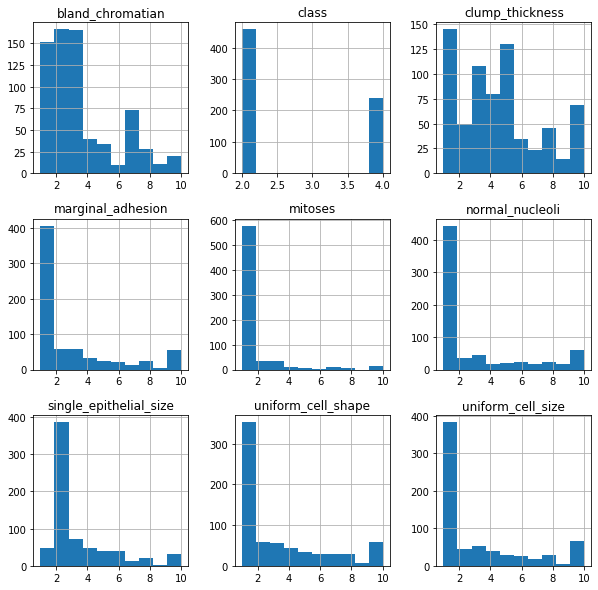

In [73]:
#plot Histograms for each variable
df.hist(figsize = (10,10))
plt.show()

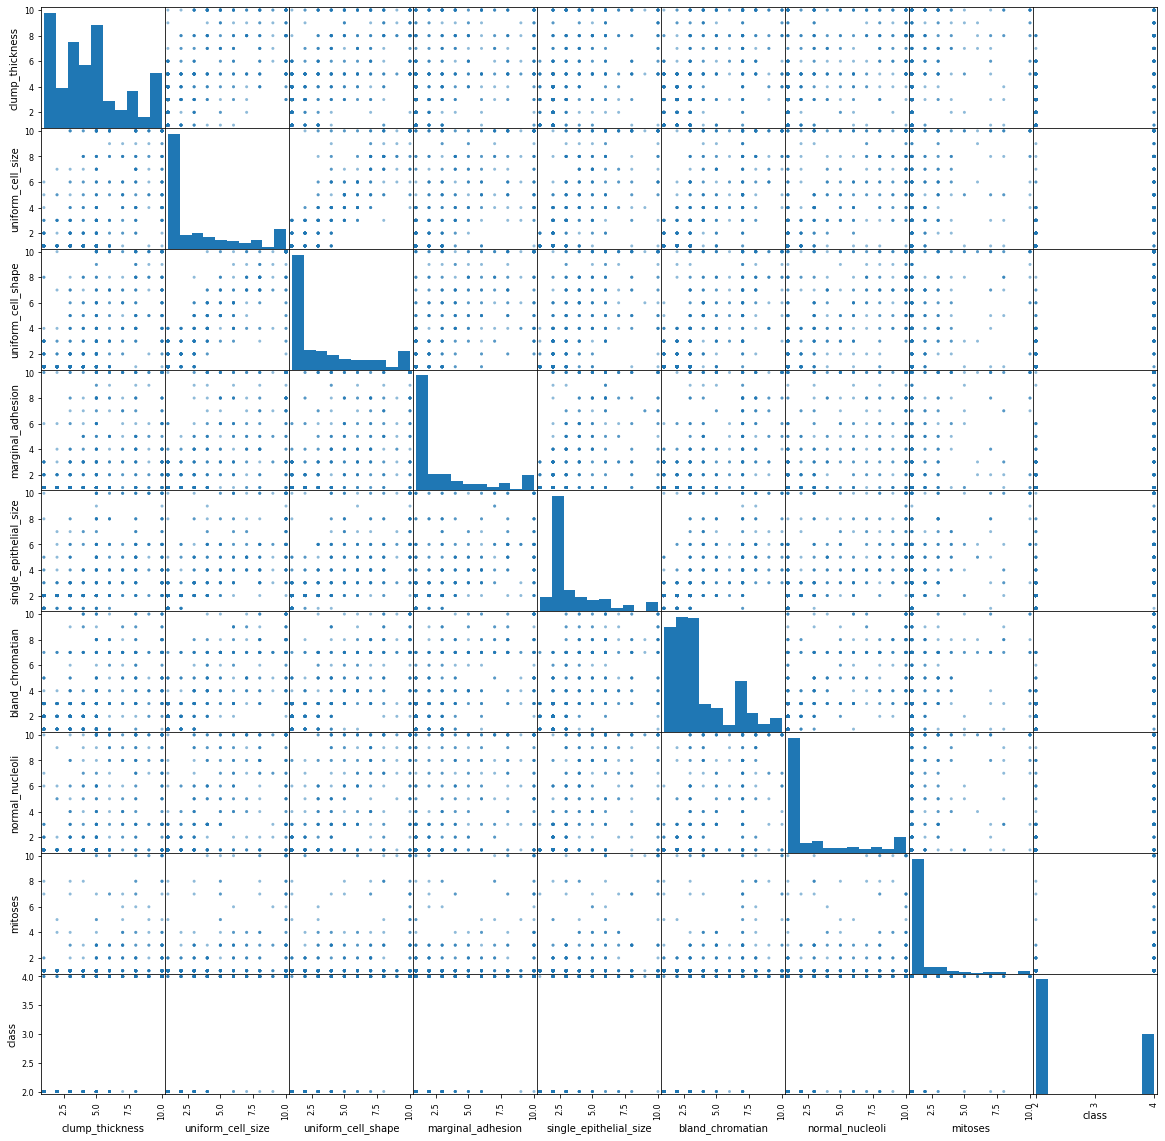

In [74]:
#create scatter plot matrix
#to get to know relationships between different variables
scatter_matrix(df, figsize = (20,20))
plt.show()

In [75]:
#creating testing and training/cross-validation set
X = np.array(df.drop(["class"],1))
y = np.array(df["class"])

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.30) # splitting % based on no of data pts


In [76]:
# specify testing parameters
seed = 5   #for consistient results
scoring = 'accuracy'

In [77]:
#define the models to train
models = []
models.append(('KNN',KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))
# we could add more models to compare

# evaluate each model in turn
results = []
names = []

#training the models
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state = seed,shuffle = True ) # run for n times and take the best results
    cv_results = model_selection.cross_val_score(model,X_train, y_train, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    msg = ("%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())) # printing mean and std for results
    print(msg)

KNN: 0.971386 (0.018686)
SVM: 0.683121 (0.062307)


 KNN is a winning this classifiaction task on training set

In [78]:
#making predictions on cross validation set

for name, model in models:
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

KNN
0.9619047619047619
              precision    recall  f1-score   support

           2       0.98      0.96      0.97       124
           4       0.94      0.97      0.95        86

    accuracy                           0.96       210
   macro avg       0.96      0.96      0.96       210
weighted avg       0.96      0.96      0.96       210

SVM
0.5904761904761905
              precision    recall  f1-score   support

           2       0.59      1.00      0.74       124
           4       0.00      0.00      0.00        86

    accuracy                           0.59       210
   macro avg       0.30      0.50      0.37       210
weighted avg       0.35      0.59      0.44       210



C:\Users\Harshit\anaconda3\envs\MachineLearningMIT\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# we see that KNN is a much better classifier


In [79]:
#example
clf = SVC()
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,10]])
example = example.reshape(len(example), -1)
prediction = clf.predict(example)
print(prediction)

0.5904761904761905
[2]


# RESULT-
## we see that KNN predicts with an accuracy of 96% or plus so it can be used for detecting cancer and
## SVM predicts with an accuracy  of 68% so it is not a good algorithm to choose in this casr